In [1]:
from OLS.OLS import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')

## Import data for EDA

Import Boston dataset with the next attributes columns:

1. *CRIM*      per capita crime rate by town
2. *ZN*        proportion of residential land zoned for lots over  25,000 sq.ft.
3. *INDUS*     proportion of non-retail business acres per town
4. *CHAS*      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. *NOX*       nitric oxides concentration (parts per 10 million)
6. *RM*        average number of rooms per dwelling
7. *AGE*       proportion of owner-occupied units built prior to 1940
8. *DIS*       weighted distances to five Boston employment centres
9. *RAD*       index of accessibility to radial highways
10. *TAX*      full-value property-tax rate per \$10000
11. *PTRATIO*  pupil-teacher ratio by town
12. *BRATIO*        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. *LSTAT*    % lower status of the population
14. *MEDV*     Median value of owner-occupied homes in \$1000's


In [2]:
dataset_name = 'housing.data'
dataset_columns = ['CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BRATIO', 'LSTAT', 'MEDV']

dataset = pd.read_csv('datasets/housing.data', 
                      delim_whitespace=True, 
                      header=None, 
                      names=dataset_columns)

### Dataset analysis

Perform simple dataset analysis on correlation, atd.

In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.head()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.tail()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
dataset.describe()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
def colorCorrelatedFeatures(value):
    """
    Color higly correlated pairs of features
    """
    color = 'green' if abs(value) > 0.74 and abs(value) != 1 else 'white'
    return 'background-color: %s' % color
    

dataset.corr().style.applymap(colorCorrelatedFeatures)

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Let's investigate mostly correlated features

I will plot them as scatter plots to see the next points:

1. Mostly correlated parts of the graph
2. Possible outliers of the 4 plots
3. The necessity of scaling some axes

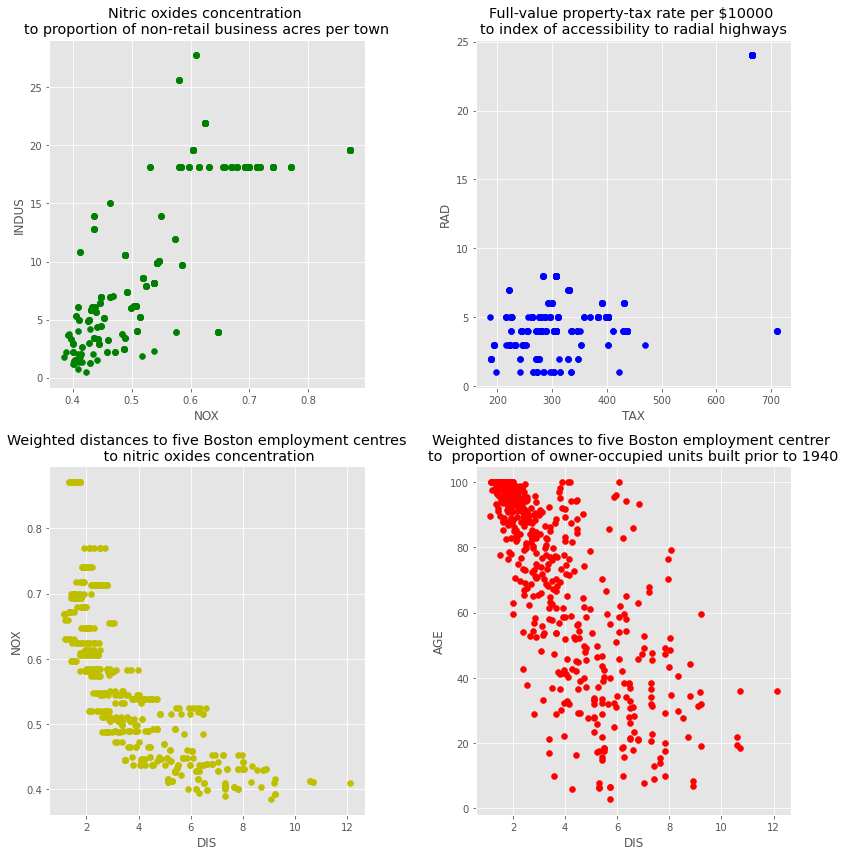

In [8]:
def plot(axes, x_feature, y_feature, x_label, y_label, color, description):
    """
    Plots scatter plot with the specified parameters
    """
    axes.scatter(x_feature, y_feature, c=color)
    axes.set_title(description)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)

def plotFeatures():
    
    figure, (axes1, axes2) = plt.subplots(2, 2, figsize = (12, 12))

    description = "Nitric oxides concentration \nto proportion of non-retail business acres per town"
    plot(axes1[0], dataset['NOX'], dataset['INDUS'], 'NOX', 'INDUS', 'g', description)

    description = "Weighted distances to five Boston employment centres\n to nitric oxides concentration"
    plot(axes2[0], dataset['DIS'], dataset['NOX'], 'DIS', 'NOX', 'y', description)

    description = "Full-value property-tax rate per $10000 \nto index of accessibility to radial highways"
    plot(axes1[1], dataset['TAX'], dataset['RAD'], 'TAX', 'RAD', 'b', description)
    
    description = "Weighted distances to five Boston employment centrer \nto  proportion of owner-occupied units built prior to 1940"
    plot(axes2[1], dataset['DIS'], dataset['AGE'], 'DIS', 'AGE', 'r', description)
    
    figure.tight_layout()
    
    plt.show()

plotFeatures()

In [9]:
def normalize(series: pd.Series) -> pd.Series:
    """
    Basic min-max normalization
    """
    return(series - series.min()) / (series.max() - series.min())

def filter_max(series: pd.Series, maximum_value):
    """
    Replaces outliers with the mean value
    """
    mean = series.mean()
    return series.apply(lambda x: x if x < maximum_value else mean)
    

Here we see that the mostly data is not clean and need some preparation:

### Plot NOX to INDUS:
As I see NOX is the percentage in range from 0 to 1, but mostly features as in range from 0 to 0.7, so remove outliers and normalise INDUS column

In [10]:
dataset['NOX'] = filter_max(dataset['NOX'], 0.7)
dataset['INDUS'] = filter_max(dataset['INDUS'], 15)
dataset['INDUS'] = normalize(dataset['INDUS'])

### Plot NOX to the DIS
Here we can try to normalize dis feature

In [11]:
dataset['DIS'] = normalize(dataset['DIS'])

### Plot RAD to TAX
Perform only basic min-max normalization, as removing outliers has shown a decrease in the high correlation between two features

In [12]:
dataset['TAX'] = normalize(dataset['TAX'])
dataset['RAD'] = normalize(dataset['RAD'])

### Plot AGE to DIS
1. Age is the proportion from 0 to 100, so normalize to range 0 to 1
2. Dis also can be normalised to the range 0 to 1

In [13]:
dataset['DIS'] = filter_max(dataset['DIS'], 0.8)
dataset['AGE'] = normalize(dataset['AGE'])

## Let's see the results 

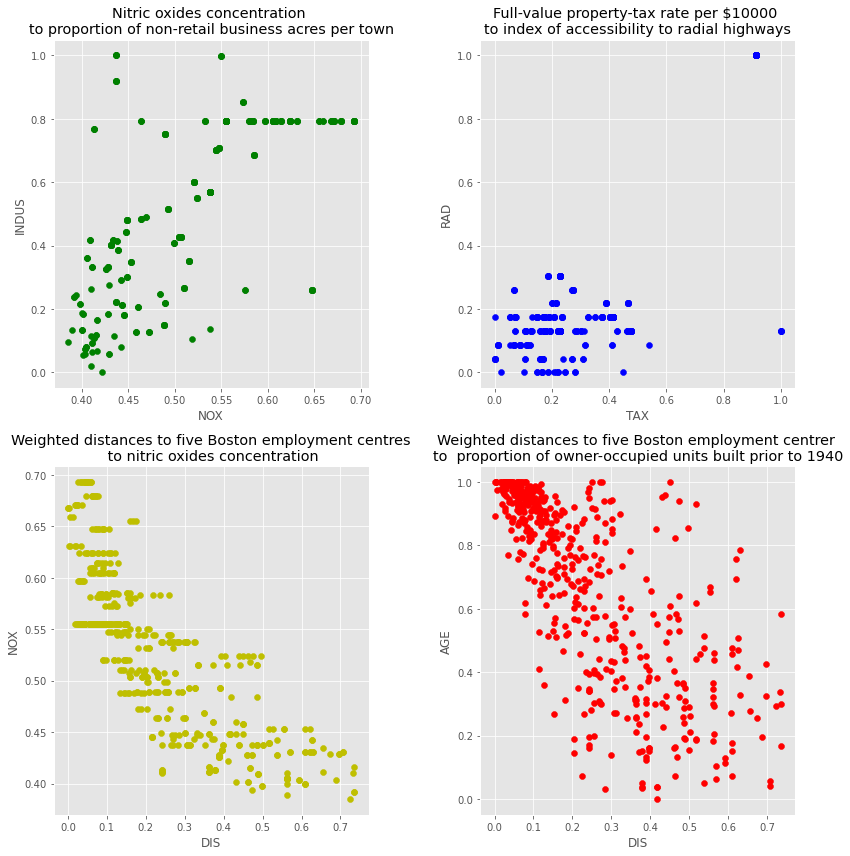

In [14]:
plotFeatures()

In [15]:
dataset.corr().style.applymap(colorCorrelatedFeatures)

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.352188,-0.055892,0.495886,-0.219247,0.352734,-0.389057,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.643928,-0.042697,-0.584280,0.311991,-0.569537,0.609746,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.352188,-0.643928,1.000000,0.105238,0.648586,-0.428583,0.572571,-0.644311,0.529890,0.613338,0.420531,-0.301809,0.567246,-0.505093
CHAS,-0.055892,-0.042697,0.105238,1.000000,0.007674,0.091251,0.086518,-0.095748,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.495886,-0.584280,0.648586,0.007674,1.000000,-0.249425,0.752257,-0.810125,0.570451,0.622758,0.306780,-0.312849,0.554189,-0.360033
RM,-0.219247,0.311991,-0.428583,0.091251,-0.249425,1.000000,-0.240265,0.223468,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.572571,0.086518,0.752257,-0.240265,1.000000,-0.742399,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.389057,0.609746,-0.644311,-0.095748,-0.810125,0.223468,-0.742399,1.000000,-0.504218,-0.551729,-0.262901,0.300363,-0.496330,0.265375
RAD,0.625505,-0.311948,0.529890,-0.007368,0.570451,-0.209847,0.456022,-0.504218,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.613338,-0.035587,0.622758,-0.292048,0.506456,-0.551729,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
dataset.head()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
0,0.00632,18.0,0.137444,0,0.538,6.575,0.641607,0.269203,0.000000,0.208015,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.491085,0,0.469,6.421,0.782698,0.348962,0.043478,0.104962,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.491085,0,0.469,7.185,0.599382,0.348962,0.043478,0.104962,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.127786,0,0.458,6.998,0.441813,0.448545,0.086957,0.066794,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.127786,0,0.458,7.147,0.528321,0.448545,0.086957,0.066794,18.7,396.90,5.33,36.2


### OLS

Let's try to perform basic linear regression on the current features. 
OLS module supports different configurations and different regressions:

1. Basic linear regression, which is stastically calculated, using matrix operations
2. Gradient descent and its specifications, like (SGD and minibatch GD)

In [17]:
train_data = dataset.sample(frac = 0.8)
test_data = dataset.drop(train_data.index)

### Linear regression predictions

Perform basic statistical linear regression:

This type of the regression provides the minimal MSE error and provides best fit for the data, however, the computation complexity is near O(n^2) to O(n^3) depending on the implementation of the matrix multiplication

In [18]:
def create_linear_model(train_data, labels, target) -> OLS:
    """
    Create linear regression model and perform fit
    
    Input:
        labels - the list of the labels from the dataset
        targets - the name of the target from the dataset
    
    """
    model = OLS()
    model.fit(
        np.array(train_data[labels]), 
        np.array(train_data[[target]])
    )
    return model

def render_plot(axes, dataset: pd.DataFrame, prediction, 
                label: str, target: str, split: str):
    """
        Renders plot on the matplotlib.axes
        
        Input:
            axes - axes to draw on
            dataset - train and test datasets
            prediction - vector of predictions
            label - feature label
            target - target label
            split - string, which shows, which split is it
    """
    
    color = (np.random.rand(), np.random.rand(), np.random.rand())
    
    axes.scatter(dataset[[label]], dataset[[target]], c=[color])
    
    axes.set_title("Regression result between {} and {} ({})".format(label, target, split))
    axes.set_xlabel(label)
    axes.set_ylabel(target)
    
    axes.plot(
        dataset[[label]], 
        prediction,
        c = 'r'
    )

def visualize_linear_reg_result(model: OLS, train_data, test_data, label, target):
    """
    Draw a scatter plot with the prediction line:
    
    Input:
        label - the name of the label from the dataset
        target - the name of the target from the dataset
    """
    
    slopes = model.slopes
    
    prediction = model.predict(np.array(train_data[[label]]))
    print("Train data score: ", model.score(np.array(train_data[[target]]), prediction))
    
    figure, (axes1, axes2) = plt.subplots(1, 2, figsize = (12, 6))
    
    render_plot(axes1, train_data, prediction, label, target, 'train_data')

    prediction = model.predict(np.array(test_data[[label]]))
    print("Test data score: ", model.score(np.array(test_data[[target]]), prediction))
    
    render_plot(axes2, test_data, prediction, label, target, 'test_data')
    
    figure.tight_layout()
    
    plt.show()

In [19]:
%%time
linear_model = create_linear_model(train_data, ['NOX'], 'INDUS')

CPU times: user 2.27 ms, sys: 223 µs, total: 2.49 ms
Wall time: 2.03 ms


Train data score:  0.04045798342629867
Test data score:  0.026926747969183918


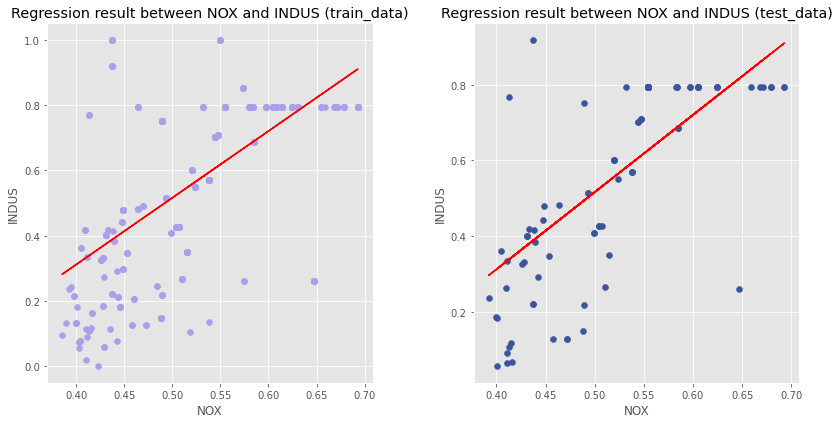

In [20]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'NOX', 'INDUS')

In [21]:
%%time
linear_model = create_linear_model(train_data, ['DIS'], 'NOX')

CPU times: user 1.8 ms, sys: 123 µs, total: 1.92 ms
Wall time: 1.61 ms


Train data score:  0.0021136983175653926
Test data score:  0.0020697198851334694


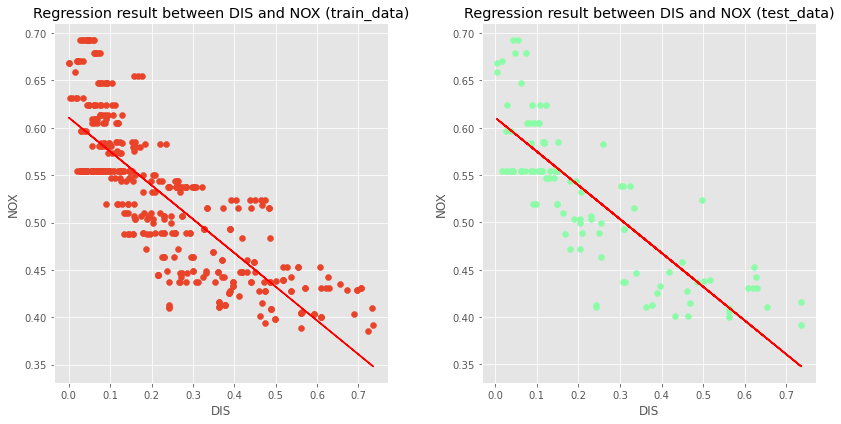

In [22]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'DIS', 'NOX')

In [23]:
%%time
linear_model = create_linear_model(train_data, ['RAD'], 'TAX')

CPU times: user 1.87 ms, sys: 129 µs, total: 2 ms
Wall time: 1.62 ms


Train data score:  0.018652048457037104
Test data score:  0.013957419558260313


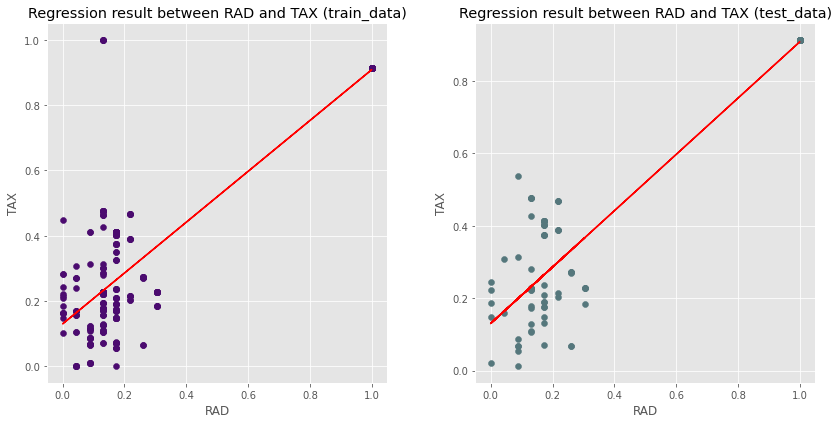

In [24]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'RAD', 'TAX')

In [25]:
%%time
linear_model = create_linear_model(train_data, ['DIS'], 'AGE')

CPU times: user 1.99 ms, sys: 144 µs, total: 2.14 ms
Wall time: 1.71 ms


Train data score:  0.03709679433075336
Test data score:  0.03992176610577902


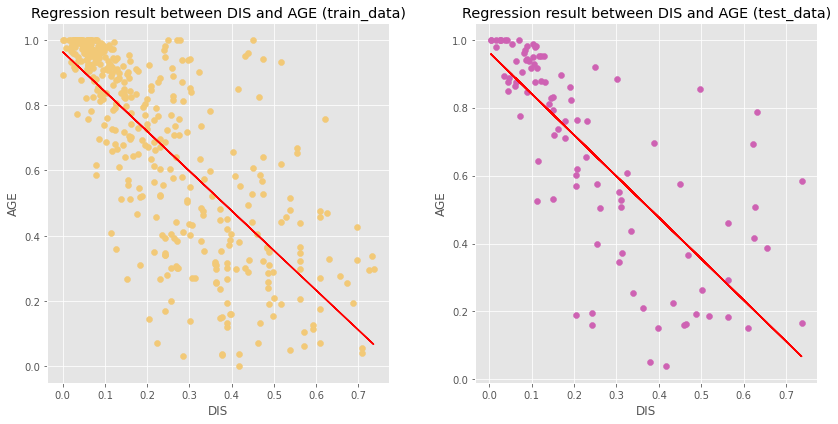

In [26]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'DIS', 'AGE')

# Gradient descent

Gradient descent is the approach, which is used to minimize some function by repeated iterated move in the direction of the minimum.

There are 3 basic parameters for GD:

1. Number of the iterations is the first one and it shows, how much iterations should be performed
2. Tolerance is the threshold of the difference in the cost function values. As we use GD, the cost function is the MSE.
3. Learning step tells the model, how fast should it move to the minimum of the function. The better the learning learning step is chosen, the faster the model will find the minimum. In comparison, a big learning step can result into overflow and a small learning step can significantly decrease the speed of the approximation.

Current implementation supports all these options and sets `slopes_records` and `cost_records` to visualize the process

Also OLS module supports:

1. Stochastic Gradient Descent is the gd, but takes only one sample from the training dataset per iteration. (It is the simplest implementation, where the learning step plays the key-role, other implementations can be found [here](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
2. Minibatch Gradient Descent is the sgd, but takes m samples from the trainit dataset per iteration.

In [27]:
def create_gd_model(train_data, 
                    labels, 
                    target, 
                    number_of_iterations = 1000,
                    tolerance = 0.00001, 
                    learning_step = 0.001,
                    batch_size = 1,
                    type = 'GD') -> OLS:
    """
    Create gd model and perform fit
    
    Input:
        labels - the list of the labels from the dataset
        targets - the name of the target from the dataset
    
    """
    model = OLS(number_of_iterations, tolerance, learning_step, batch_size, type)
    model.fit(
        np.array(train_data[labels]), 
        np.array(train_data[[target]])
    )
    return model

In [28]:
def render_approximation_process(model: OLS, train_data, label, target, skipOffset = 20):
    """
    Renders the process approximation using the cost records from the model
    
    Input:
        model - OLS model
        train_data - dataset for train
        label - label from the train dataset
        target - target label from the train dataset
        skipOffset - shows the number of records to skip
    """
    mse_errors = model.cost_records
    slopes_records = [model.slopes_records[0]]
    slopes_records += model.slopes_records[::skipOffset]
    slopes_records += [model.slopes_records[-1]]
    
    number_of_iterations = len(mse_errors)
    
    figure, (axes1, axes2) = plt.subplots(1, 2, figsize = (12, 6))
    
    axes1.set_title("MSE error")
    axes1.plot(np.arange(number_of_iterations), mse_errors)
    
    minimum = train_data[[label]].min()
    maximum = train_data[[label]].max()
    
    lin_space = np.linspace(minimum, maximum, 100)
    
    axes2.set_title("Learning process")
    axes2.scatter(train_data[[label]], train_data[target], c='r')
    
    for slope in enumerate(slopes_records):
        color = 'r' if slope[0] < len(slopes_records) - 1 else 'b'
        linewidth = 0.5 if slope[0] < len(slopes_records) - 1 else 1
        slopes = np.flip(slope[1].reshape(len(slope[1])), 0)
        function = np.poly1d(slopes)
        
        axes2.plot(lin_space, function(lin_space), linewidth = linewidth, c=color)

    figure.tight_layout()

### Video animation

Visualize the learning process at the speed of the 30 FPS and saves the output video to the file `videos/label_target_model_type_animation.mp4`. Add manually to the notebook, as execution can take time to execute.

In [29]:
def animate_approximation_process(model: OLS, train_data, label, target, skipOffset = 1):
    """
    Renders the process approximation using the cost records from the model and
    saves the result to the basic_animation.mp4
    
    Input:
        model - OLS model
        train_data - dataset for train
        label - label from the train dataset
        target - target label from the train dataset
        skipOffset - shows the number of records to skip
    """
    mse_errors = model.cost_records
    slopes_records = [model.slopes_records[0]]
    slopes_records += model.slopes_records[::skipOffset]
    slopes_records += [model.slopes_records[-1]]
    
    number_of_iterations = len(slopes_records)
    
    figure, (axes1, axes2) = plt.subplots(1, 2, figsize = (12, 6))
    
    axes1.set_title("MSE error")
    axes1.set_xlabel("Number of iterations")
    axes1.set_ylabel("MSE error")
    
    mse_plot = axes1.plot()
    
    minimum = train_data[[label]].min()
    maximum = train_data[[label]].max()
    
    lin_space = np.linspace(minimum, maximum, 100)
    
    axes2.set_title("Learning process")
    axes2.scatter(train_data[[label]], train_data[target], c='r')
    axes2.set_xlabel(label)
    axes2.set_ylabel(target)
    axes2.set_ylim(bottom=train_data[target].min() - 0.1)
    
    line_plot, = axes2.plot(lin_space, lin_space)
    
    def animate(frame):
        # Render mse error
        if frame < len(mse_errors):
            axes1.plot(np.arange(number_of_iterations)[:frame], mse_errors[:frame], c='r')

        # Render slopes
        slope = slopes_records[frame]
        slopes = np.flip(slope.reshape(len(slope)), 0)
        function = np.poly1d(slopes)
        
        color = 'r' if frame < len(slopes_records) - 1 else 'y'
        linewidth = 0.5 if frame < len(slopes_records) - 1 else 1
        
        predictions = function(lin_space)

        line_plot.set_ydata(predictions)
        line_plot.set_color(color)
        line_plot.set_linewidth(linewidth)
        line_plot.set_alpha(0.8)
    
    animation = FuncAnimation(figure, animate, frames = number_of_iterations)
    animation.save('videos/{}-{}-{}.mp4'.format(label, target, model.type), fps=30, extra_args=['-vcodec', 'libx264'])
    return None

## NOX/INDUS

In [30]:
%%time
gd_model = create_gd_model(train_data, ['NOX'], 'INDUS')

CPU times: user 13.9 ms, sys: 1.93 ms, total: 15.9 ms
Wall time: 14.5 ms


Train data score:  0.04173302828816545
Test data score:  0.030316363160608508


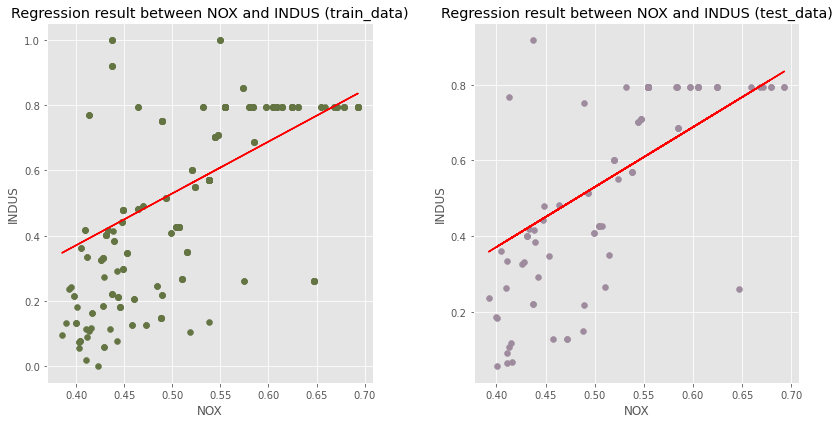

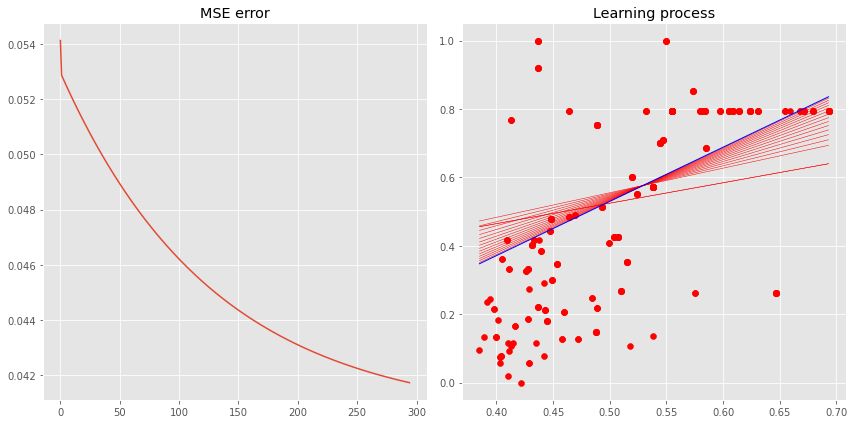

In [31]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'NOX', 'INDUS')
render_approximation_process(gd_model, train_data, 'NOX', 'INDUS')

In [32]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['NOX'], 
    'INDUS', 
    number_of_iterations=3000,
    learning_step=0.01, 
    type='SGD'
)

CPU times: user 165 ms, sys: 17.4 ms, total: 183 ms
Wall time: 171 ms


Train data score:  0.04846482208832578
Test data score:  0.03948169046778416


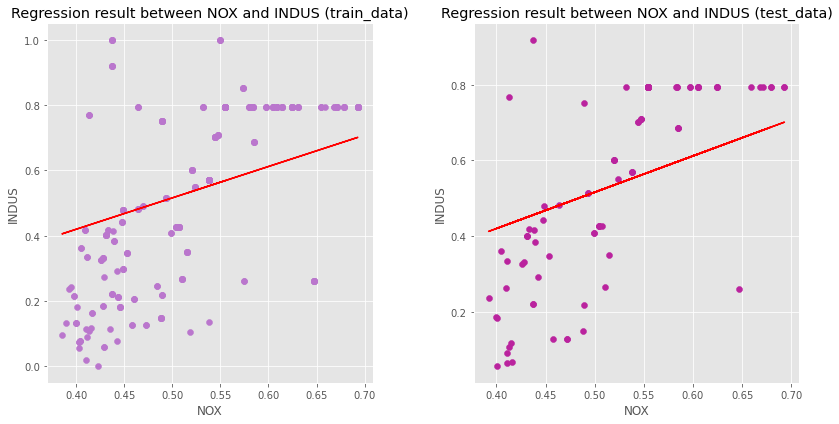

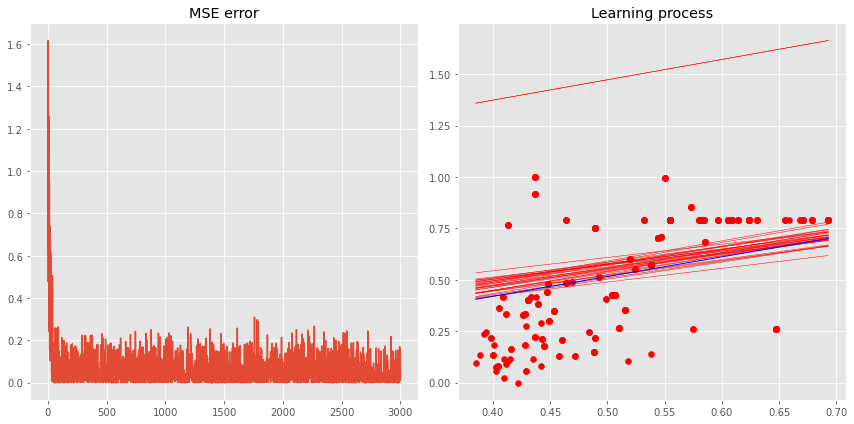

In [33]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'NOX', 'INDUS')
render_approximation_process(gd_model, train_data, 'NOX', 'INDUS', skipOffset = 100)

In [34]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['NOX'], 
    'INDUS', 
    batch_size=20,
    learning_step = 0.01,
    type='MGD'
)

CPU times: user 22.3 ms, sys: 2.05 ms, total: 24.4 ms
Wall time: 23.5 ms


Train data score:  0.04538384053256543
Test data score:  0.03608860597871373


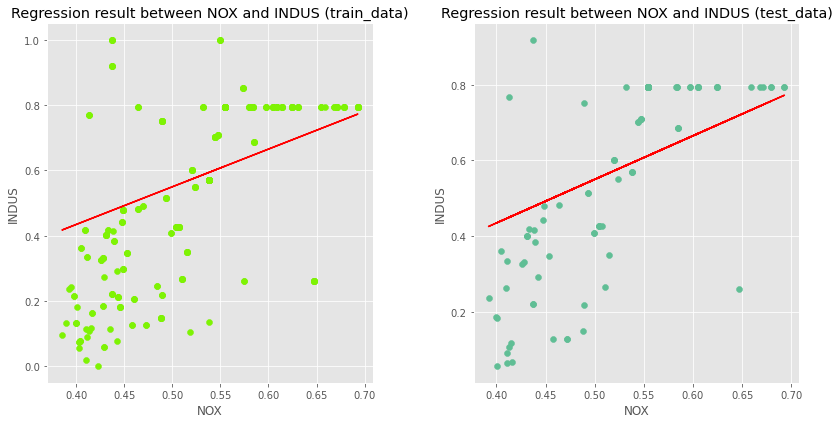

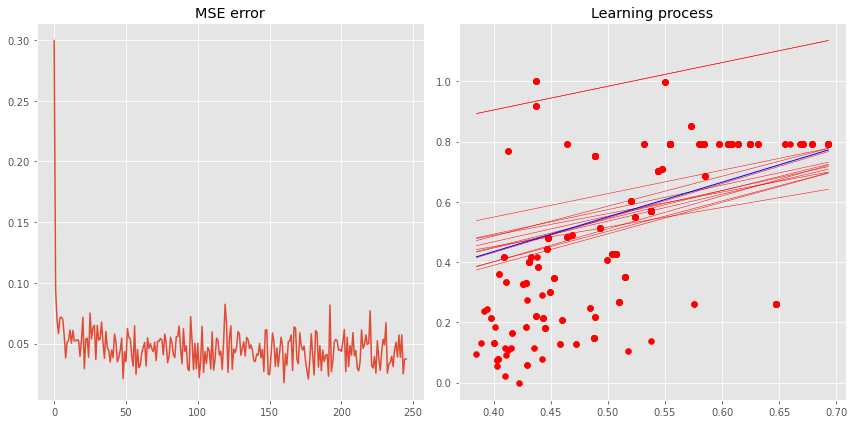

In [35]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'NOX', 'INDUS')
render_approximation_process(gd_model, train_data, 'NOX', 'INDUS', skipOffset = 20)

## DIS/NOX

In [36]:
%%time
gd_model = create_gd_model(train_data, ['DIS'], 'NOX')

CPU times: user 7.49 ms, sys: 1.73 ms, total: 9.23 ms
Wall time: 7.84 ms


Train data score:  0.0023048844596017517
Test data score:  0.0021665116539409898


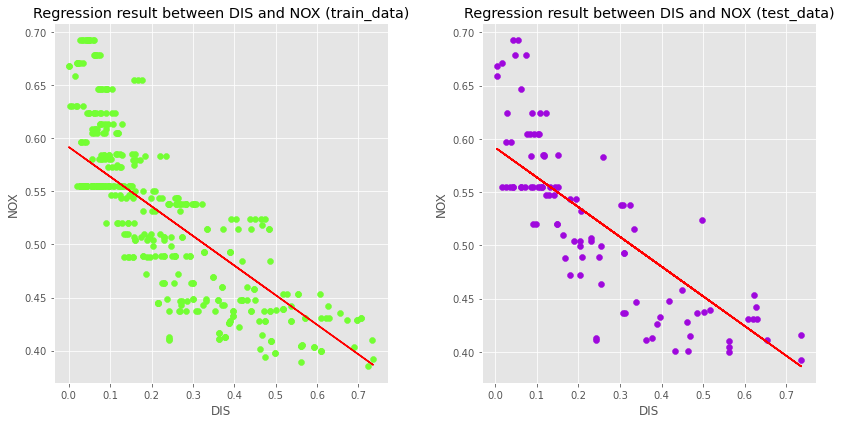

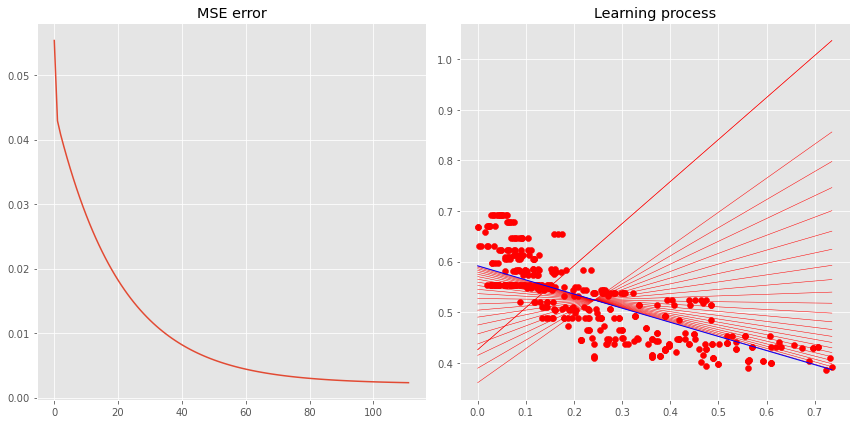

In [37]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'NOX')
render_approximation_process(gd_model, train_data, 'DIS', 'NOX', skipOffset = 5)

In [38]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['DIS'], 
    'NOX',
    number_of_iterations=1000,
    tolerance = 0,
    learning_step=0.1, 
    type='SGD'
)

CPU times: user 64.1 ms, sys: 6.9 ms, total: 71 ms
Wall time: 67.1 ms


Train data score:  0.0028949444003757143
Test data score:  0.0026358968921533954


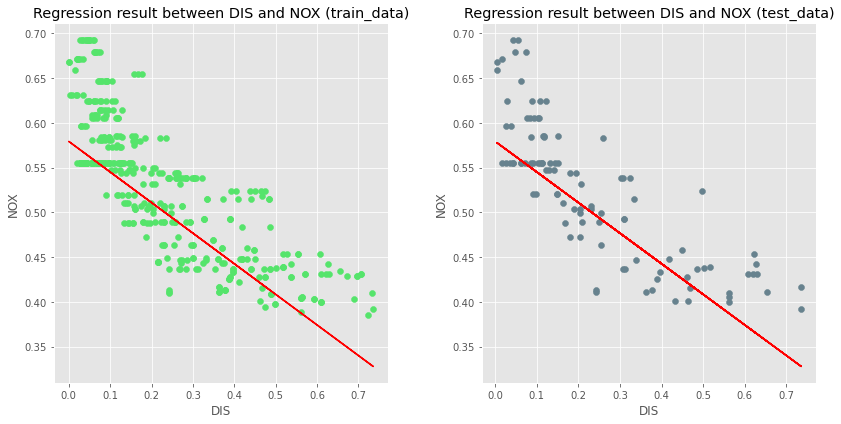

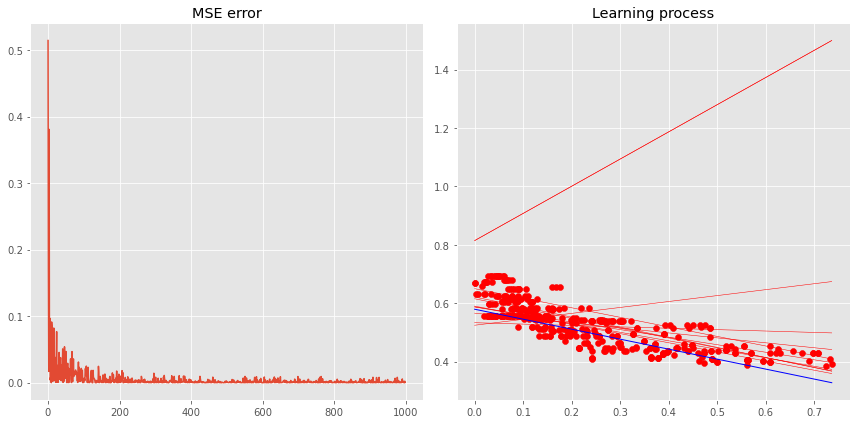

In [39]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'NOX')
render_approximation_process(gd_model, train_data, 'DIS', 'NOX', skipOffset = 100)

In [40]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS'], 
    'NOX', 
    tolerance=0,
    batch_size=40, 
    learning_step=0.01,
    type='MGD'
)

CPU times: user 73.5 ms, sys: 2.62 ms, total: 76.2 ms
Wall time: 75.7 ms


Train data score:  0.0021168436154964496
Test data score:  0.0020565327938360917


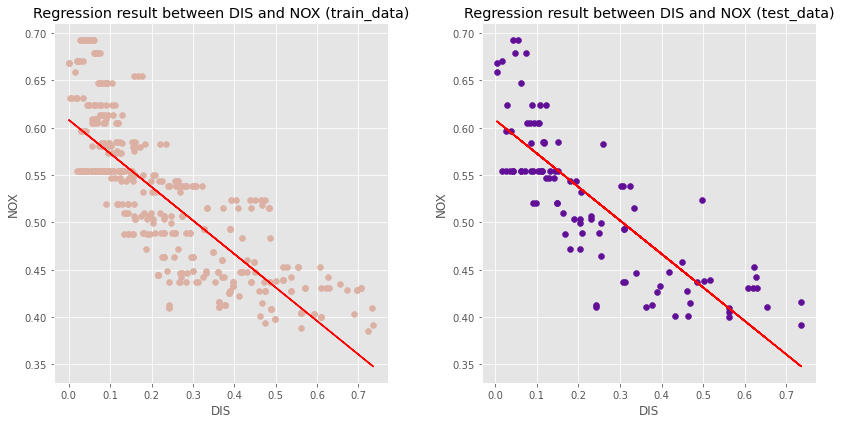

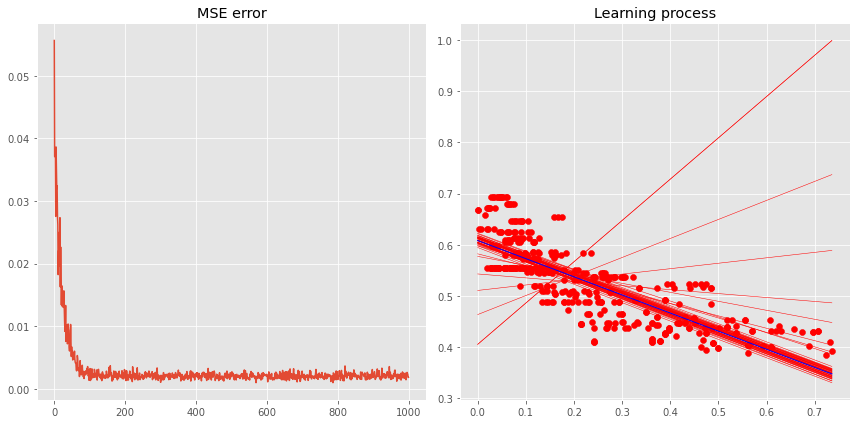

In [41]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'NOX')
render_approximation_process(gd_model, train_data, 'DIS', 'NOX', skipOffset = 20)

## RAD/TAX

In [42]:
%%time
gd_model = create_gd_model(train_data, ['RAD'], 'TAX')

CPU times: user 2.88 ms, sys: 498 µs, total: 3.38 ms
Wall time: 2.92 ms


Train data score:  0.018691494741178476
Test data score:  0.013863887916193585


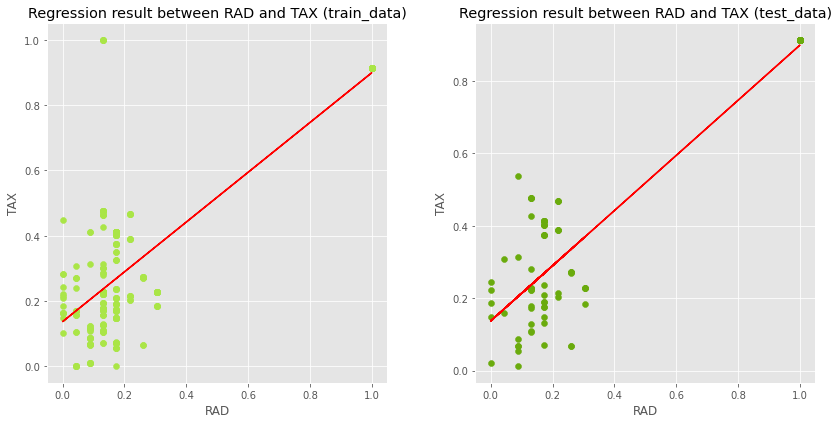

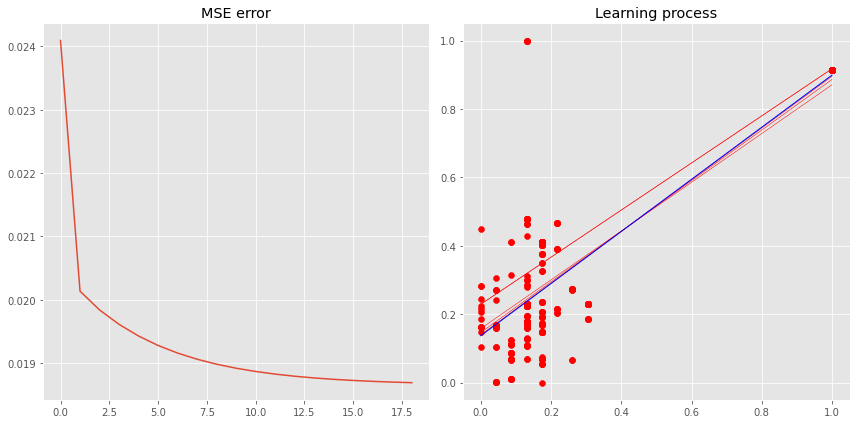

In [43]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'RAD', 'TAX')
render_approximation_process(gd_model, train_data, 'RAD', 'TAX', skipOffset = 5)

In [44]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['RAD'],
    'TAX',
    number_of_iterations=1000,
    learning_step=0.1,
    type='SGD'
)

CPU times: user 9.78 ms, sys: 1.58 ms, total: 11.4 ms
Wall time: 10.2 ms


Train data score:  0.021223744269903075
Test data score:  0.01770716681365298


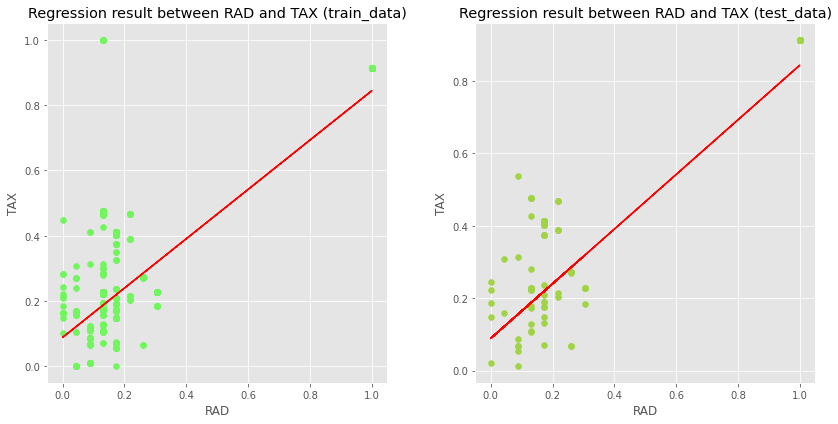

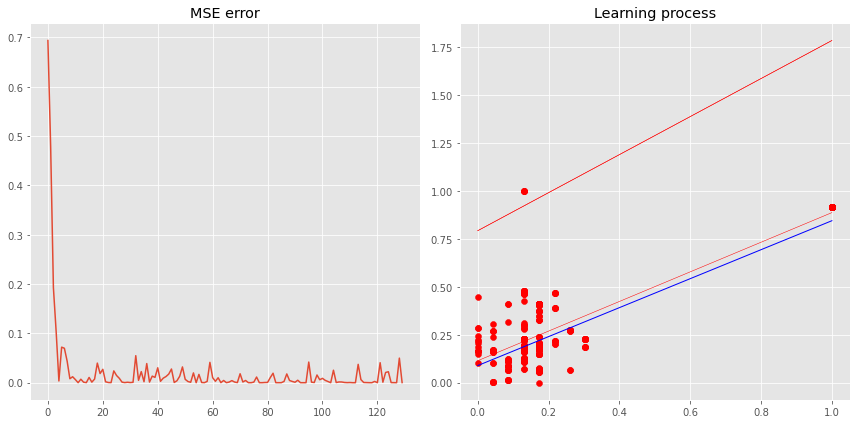

In [45]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'RAD', 'TAX')
render_approximation_process(gd_model, train_data, 'RAD', 'TAX', skipOffset = 100)

In [46]:
%%time
gd_model = create_gd_model(
    train_data,
    ['RAD'], 
    'TAX', 
    batch_size=40, 
    learning_step=0.01,
    type='MGD'
)

CPU times: user 14.9 ms, sys: 1.76 ms, total: 16.6 ms
Wall time: 15.6 ms


Train data score:  0.01895281642090432
Test data score:  0.013896798816953512


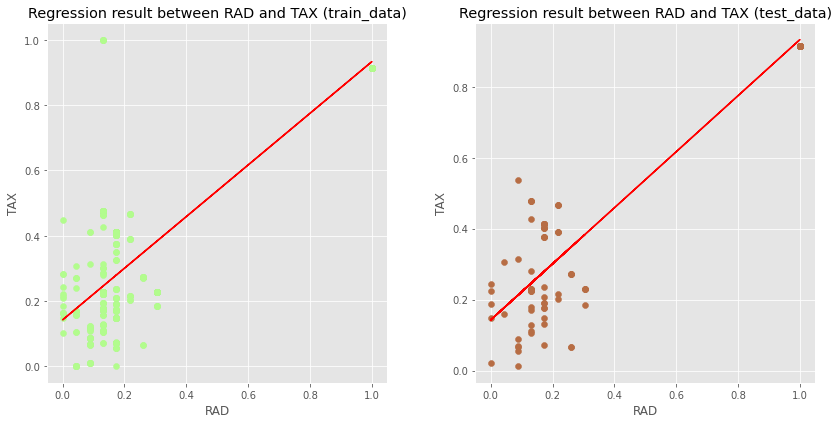

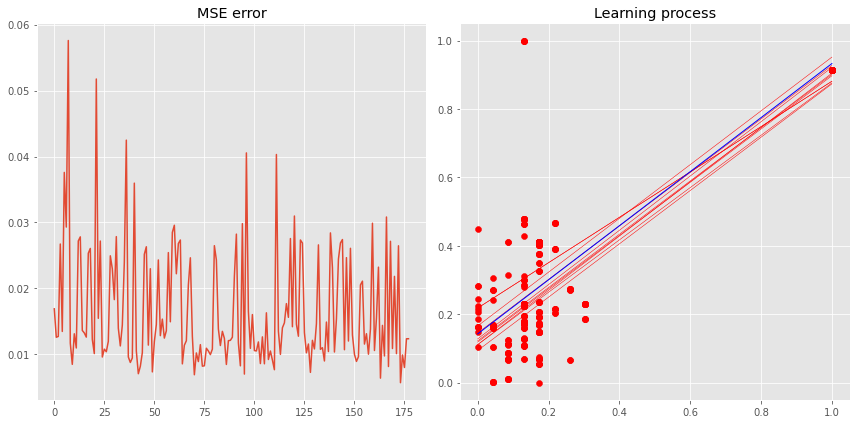

In [47]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'RAD', 'TAX')
render_approximation_process(gd_model, train_data, 'RAD', 'TAX', skipOffset = 20)

## DIS/AGE

In [48]:
%%time
gd_model = create_gd_model(train_data, ['DIS'], 'AGE')

CPU times: user 8.45 ms, sys: 943 µs, total: 9.39 ms
Wall time: 8.73 ms


Train data score:  0.037296913611963585
Test data score:  0.039608746281382876


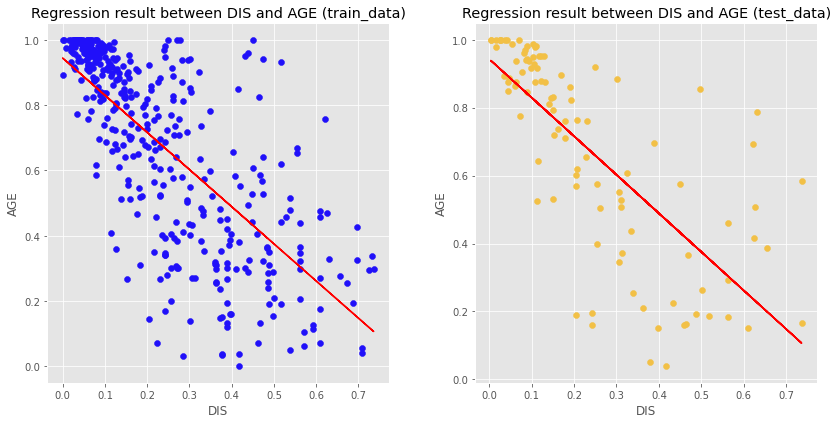

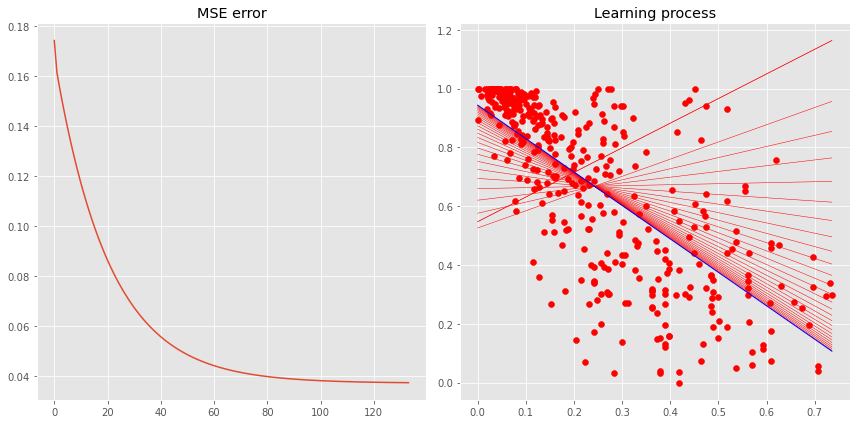

In [49]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'AGE')
render_approximation_process(gd_model, train_data, 'DIS', 'AGE', skipOffset = 5)

In [50]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['DIS'],
    'AGE',
    learning_step=0.1,
    type='SGD'
)

CPU times: user 34.2 ms, sys: 1.76 ms, total: 35.9 ms
Wall time: 36.1 ms


Train data score:  0.0403068867614716
Test data score:  0.04208290535850681


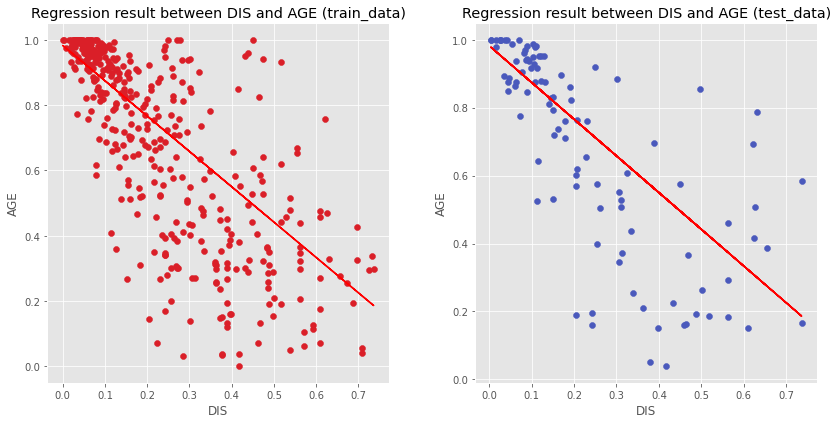

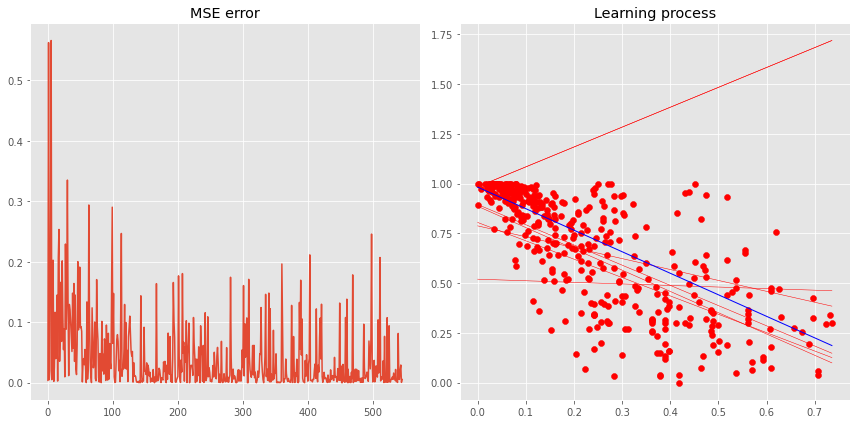

In [51]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'AGE')
render_approximation_process(gd_model, train_data, 'DIS', 'AGE', skipOffset = 100)

In [52]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS'], 
    'AGE', 
    batch_size=40, 
    learning_step=0.01,
    type='MGD'
)

CPU times: user 30.5 ms, sys: 3.57 ms, total: 34 ms
Wall time: 31.7 ms


Train data score:  0.03874040833106897
Test data score:  0.04126060629309194


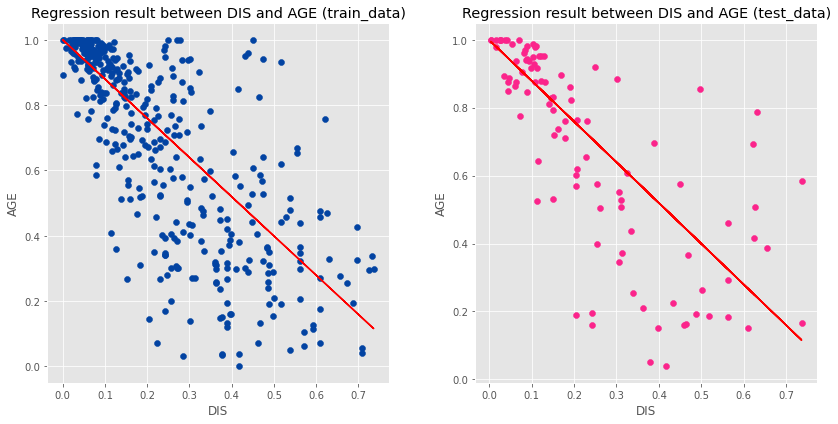

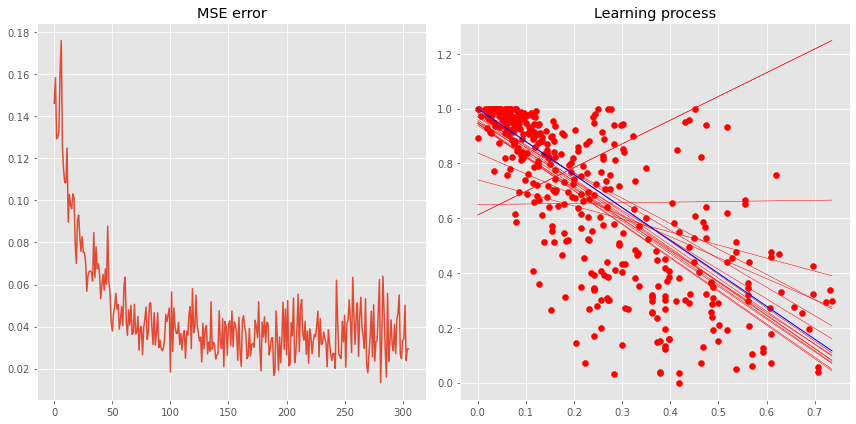

In [53]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'AGE')
render_approximation_process(gd_model, train_data, 'DIS', 'AGE', skipOffset = 20)

### Conclusion

1. According to the results SGD and MGD, which are generally slower than the GD and simple linear regression. It is true, because the dataset is relatively small and on the bigger dataset with the bigger amount of the features, the result of SGD and MGD should win over GD and simple linear regression in time.
2. GD is more stable than MGD from the view of finding the minimum.

# At final, let's try to perform multiple-feature linear regression

We will predict the concentration of nitric oxides basing on the person age and it's distance to Boston centers.

### Distribution

In [54]:
%matplotlib widget

def print_score(model, train_data, test_data, labels, target):
    prediction = model.predict(np.array(train_data[labels]))
    print("Train data score: ", model.score(np.array(train_data[[target]]), prediction))
    prediction = model.predict(np.array(test_data[labels]))
    print("Test data score: ", model.score(np.array(test_data[[target]]), prediction))

def render_3d(data, x_label, y_label, z_label):
    figure = plt.figure(figsize=(6, 6))
    axes = figure.add_subplot(111, projection='3d')
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_zlabel(z_label)
    axes.scatter(data[[x_label]], data[[y_label]], data[[z_label]], c='b', alpha=1, marker='^')

    figure.tight_layout()
    
    figure.show()
    
    return figure, axes
    
def render_3d_lin_reg_result(model, data, x_label, y_label, z_label):
    figure, axes = render_3d(data, x_label, y_label, z_label)
    print(np.array(model.predict(np.array(data[[x_label, y_label]]))).flat)
    
    x = np.arange(0.0, 1.0, 0.02)
    y = np.arange(0.0, 1.0, 0.02)
    X, Y = np.meshgrid(x, y)
    
    Z = model.slopes[0] + model.slopes[1] * X + model.slopes[2] * Y
    
    axes.plot_surface(X, Y, Z, alpha=0.3)
    
    figure.tight_layout()
    
    figure.show()

In [55]:
render_3d(train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x11fd264c0>)

### Linear regression

In [56]:
%%time
linear_model = create_linear_model(train_data, ['DIS', 'AGE'], 'NOX')

CPU times: user 12.8 ms, sys: 1.66 ms, total: 14.4 ms
Wall time: 2.54 ms


In [57]:
print_score(linear_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.001835873741947536
Test data score:  0.0016311266823276665


In [58]:
render_3d_lin_reg_result(linear_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## GD

In [59]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS', 'AGE'], 
    'NOX',
    type='GD'
)

CPU times: user 86.3 ms, sys: 5.14 ms, total: 91.5 ms
Wall time: 12.1 ms


In [60]:
print_score(gd_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.0025317887365558078
Test data score:  0.0021786153677183424


In [61]:
render_3d_lin_reg_result(gd_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### SGD

In [62]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['DIS', 'AGE'],
    'NOX',
    number_of_iterations=3000,
    tolerance = 0.0000001,
    learning_step=0.01,
    type='SGD'
)

CPU times: user 514 ms, sys: 46.3 ms, total: 560 ms
Wall time: 185 ms


In [63]:
print_score(gd_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.005848998707558333
Test data score:  0.005476788733756159


In [64]:
render_3d_lin_reg_result(gd_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## MGD

In [65]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS', 'AGE'], 
    'NOX', 
    tolerance=0.000001,
    batch_size=40,
    learning_step=0.001,
    type='MGD'
)

CPU times: user 498 ms, sys: 31.6 ms, total: 530 ms
Wall time: 97.8 ms


In [66]:
print_score(gd_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.004621468716891892
Test data score:  0.004396738368812616


In [67]:
render_3d_lin_reg_result(gd_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …